<a href="https://colab.research.google.com/github/jaswanth99999/GPT/blob/master/BERT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install transformers

import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.8 MB/s eta 0:00:00


In [ ]:
coqa = pd.read_json('http://downloads.cs.stanford.edu/nlp/data/coqa/coqa-train-v1.0.json')
coqa.head()


,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


In [ ]:
del coqa["version"]

In [ ]:
cols = ["text","question","answer"]

# j = 1
comp_list = []
for index, row in coqa.iterrows():
    for i in range(len(row["data"]["questions"])):
        temp_list = []
#         temp_list.append(j)
        temp_list.append(row["data"]["story"])
        temp_list.append(row["data"]["questions"][i]["input_text"])
        temp_list.append(row["data"]["answers"][i]["input_text"])
        comp_list.append(temp_list)
#     j += 1
new_df = pd.DataFrame(comp_list, columns=cols) 

In [ ]:
new_df.to_csv("CoQA_data.csv", index=False)


In [ ]:
new_df

,text,question,answer
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project
...,...,...,...
108642,(CNN) -- Cristiano Ronaldo provided the perfec...,Who was a sub?,Xabi Alonso
108643,(CNN) -- Cristiano Ronaldo provided the perfec...,Was it his first game this year?,Yes
108644,(CNN) -- Cristiano Ronaldo provided the perfec...,What position did the team reach?,third
108645,(CNN) -- Cristiano Ronaldo provided the perfec...,Who was ahead of them?,Barca.


In [ ]:
data = pd.read_csv("CoQA_data.csv")
data.head()

,text,question,answer
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project


In [ ]:
print("Number of question and answers: ", len(data))


Number of question and answers:  108647


In [16]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


In [17]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


In [18]:
random_num = np.random.randint(0,len(data))

question = data["question"][random_num]
text = data["text"][random_num]

In [19]:
print(question, "\n", text)

Was Fenn trusted? 
 CHAPTER XX 

Julian and Furley left the place together. They looked for the Bishop but found that he had slipped away. 

"To Downing Street, I believe," Furley remarked. "He has some vague idea of suggesting a compromise." 

"Compromise!" Julian repeated a little drearily. "How can there be any such thing! There might be delay. I think we ought to have given Stenson a week--time to communicate with America and send a mission to France." 

"We are like all theorists," Furley declared moodily, stopping to relight his pipe. "We create and destroy on palter with amazing facility. When it comes to practice, we are funks." 

"Are you funking this?" Julian asked bluntly. 

"How can any one help it? Theoretically we are right--I am sure of it. If we leave it to the politicians, this war will go dragging on for God knows how long. It's the people who are paying. It's the people who ought to make the peace. The only thing that bothers me is whether we are doing it the right w

In [20]:
input_ids = tokenizer.encode(question, text)


In [21]:
print("The input has a total of {} tokens.".format(len(input_ids)))


The input has a total of 454 tokens.


In [22]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

for token, id in zip(tokens, input_ids):
    print('{:8}{:8,}'.format(token,id))

[CLS]        101
was        2,001
fen       21,713
##n        2,078
trusted    9,480
?          1,029
[SEP]        102
chapter    3,127
xx        22,038
julian     6,426
and        1,998
fur        6,519
##ley      3,051
left       2,187
the        1,996
place      2,173
together   2,362
.          1,012
they       2,027
looked     2,246
for        2,005
the        1,996
bishop     3,387
but        2,021
found      2,179
that       2,008
he         2,002
had        2,018
slipped    5,707
away       2,185
.          1,012
"          1,000
to         2,000
downing   22,501
street     2,395
,          1,010
i          1,045
believe    2,903
,          1,010
"          1,000
fur        6,519
##ley      3,051
remarked  10,783
.          1,012
"          1,000
he         2,002
has        2,038
some       2,070
vague     13,727
idea       2,801
of         1,997
suggesting   9,104
a          1,037
compromise  12,014
.          1,012
"          1,000
"          1,000
compromise  12,014
!       

In [23]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
print(sep_idx)

#number of tokens in segment A - question
num_seg_a = sep_idx+1
print(num_seg_a)

#number of tokens in segment B - text
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

assert len(segment_ids) == len(input_ids)

6
7
447
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [24]:
#token input_ids to represent the input
#token segment_ids to differentiate our segments - text and question 
output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
#print(output.start_logits, output.end_logits)

In [25]:
#tokens with highest start and end scores
answer_start = torch.argmax(output.start_logits)
answer_end = torch.argmax(output.end_logits)
#print(answer_start, answer_end)

In [26]:
if answer_end >= answer_start:
    answer = " ".join(tokens[answer_start:answer_end+1])
else:
    print("I am unable to find the answer to this question. Can you please ask another question?")
    
print("Text:\n{}".format(text.capitalize()))
print("\nQuestion:\n{}".format(question.capitalize()))
print("\nAnswer:\n{}.".format(answer.capitalize()))

Text:
Chapter xx 

julian and furley left the place together. they looked for the bishop but found that he had slipped away. 

"to downing street, i believe," furley remarked. "he has some vague idea of suggesting a compromise." 

"compromise!" julian repeated a little drearily. "how can there be any such thing! there might be delay. i think we ought to have given stenson a week--time to communicate with america and send a mission to france." 

"we are like all theorists," furley declared moodily, stopping to relight his pipe. "we create and destroy on palter with amazing facility. when it comes to practice, we are funks." 

"are you funking this?" julian asked bluntly. 

"how can any one help it? theoretically we are right--i am sure of it. if we leave it to the politicians, this war will go dragging on for god knows how long. it's the people who are paying. it's the people who ought to make the peace. the only thing that bothers me is whether we are doing it the right way. is freistn

In [27]:
start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

In [28]:
print(len(token_labels))

454


<ipython-input-29-77abf5582e8a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)


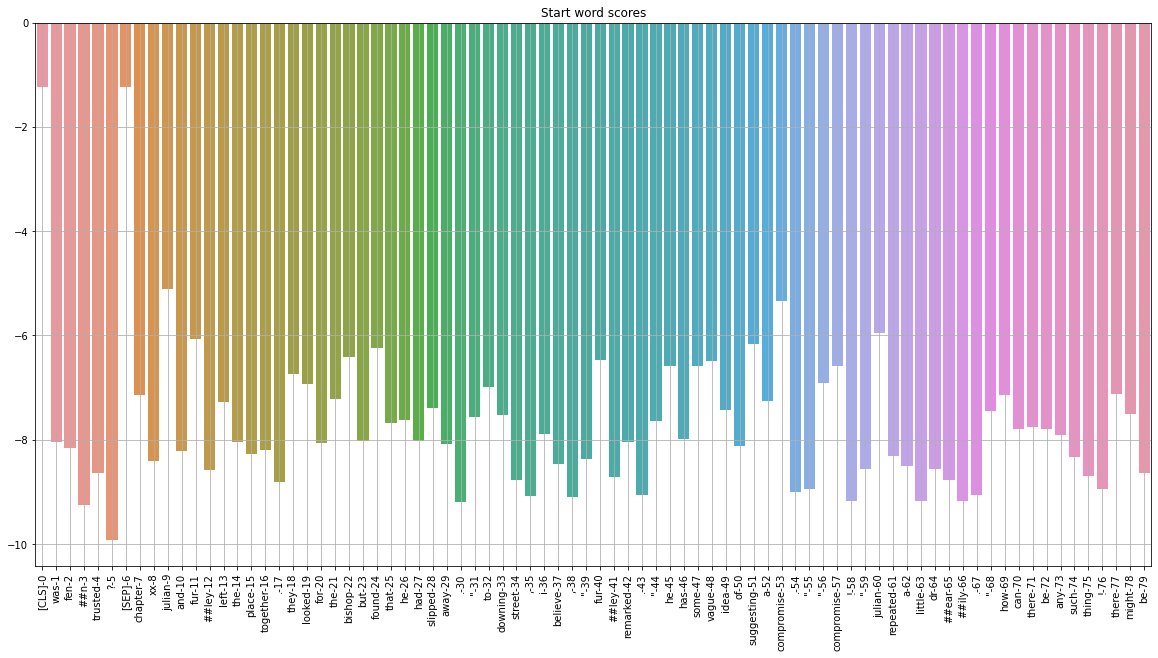

In [29]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()


<ipython-input-30-649e2ae1803a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)


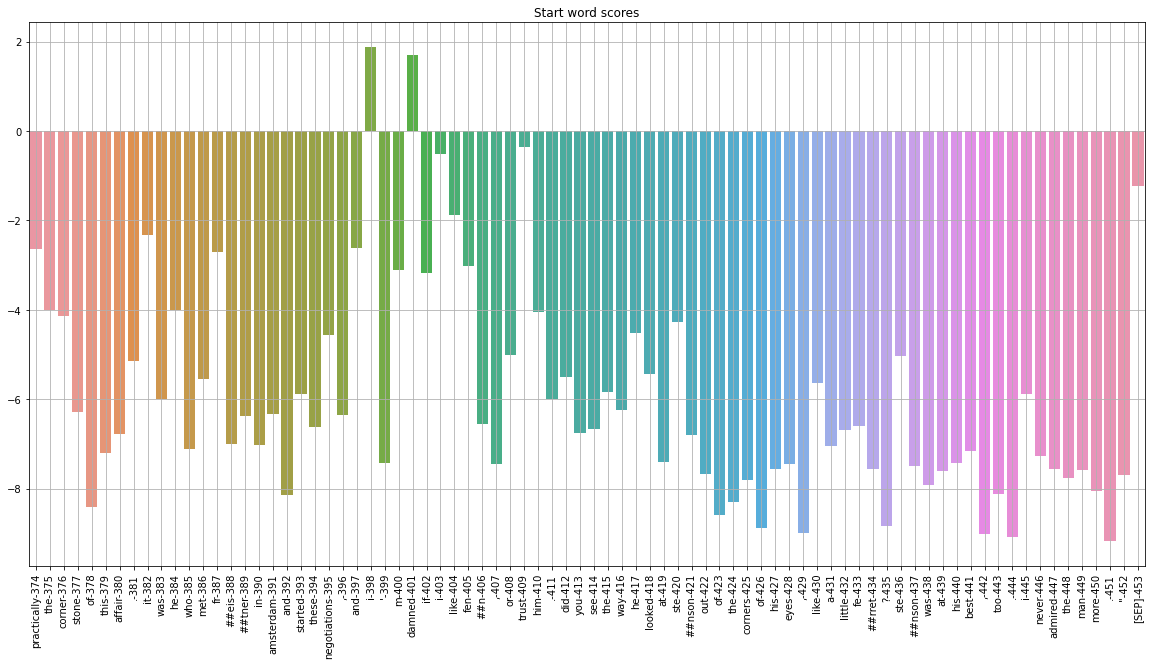

In [30]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

<ipython-input-31-b00cd955626b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[:80], y=end_scores[:80], ci=None)


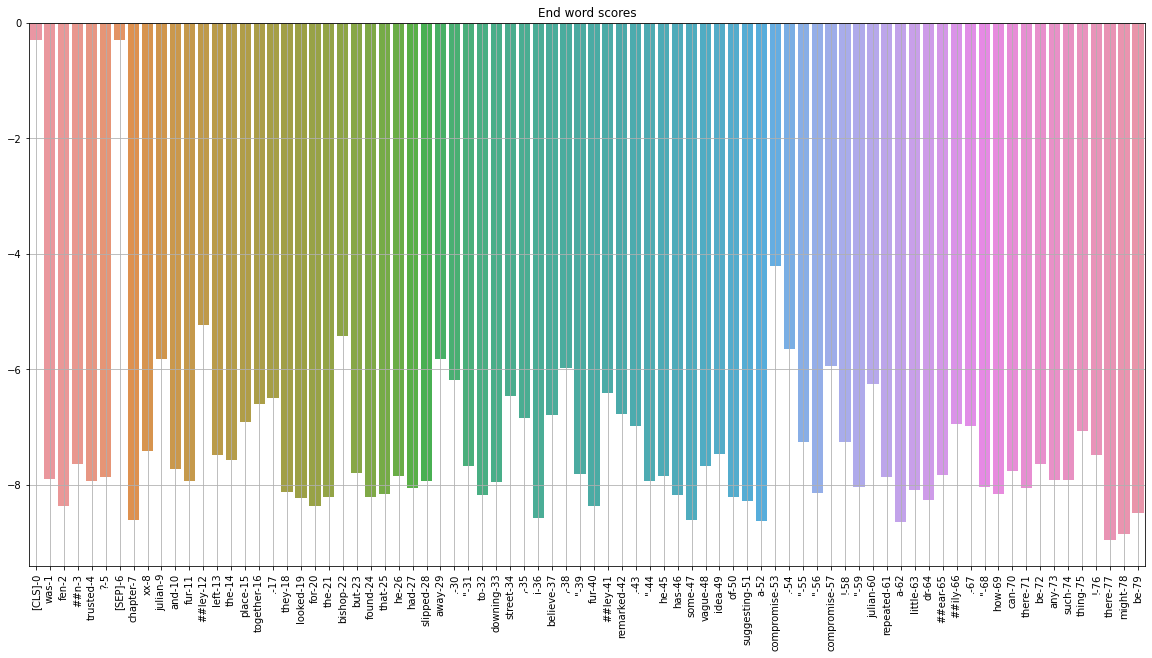

In [31]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=end_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()

<ipython-input-32-293e6a0c519d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)


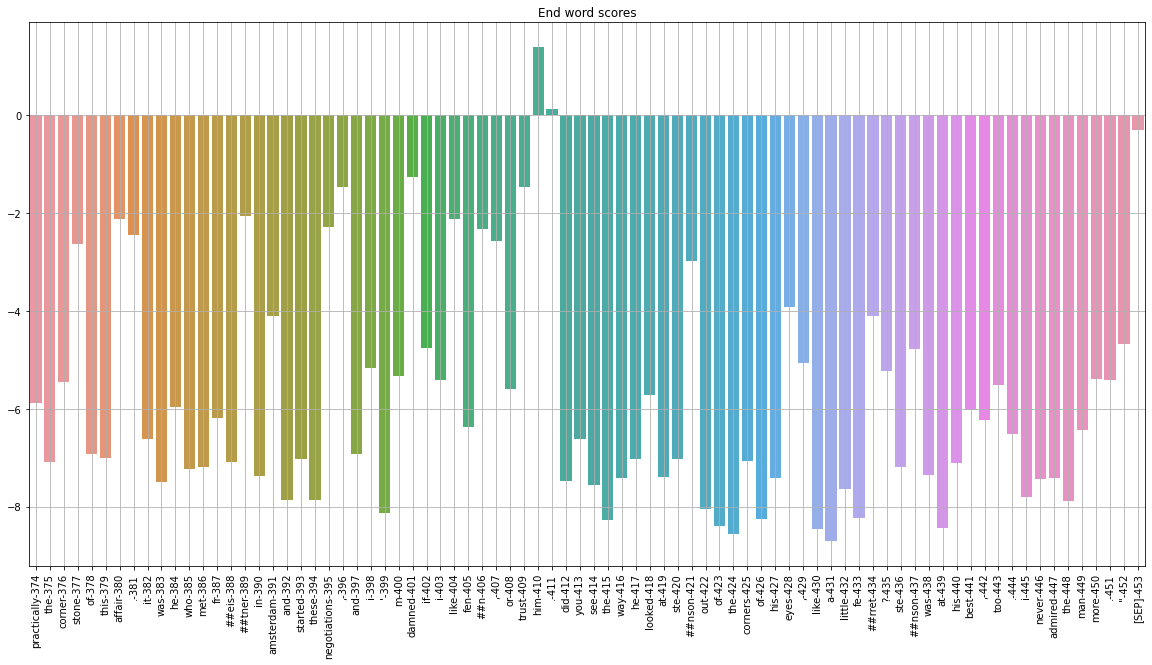

In [32]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()


In [33]:
answer = tokens[answer_start]

for i in range(answer_start+1, answer_end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]


In [34]:
def question_answer(question, text):
    
    #tokenize question and text in ids as a pair
    input_ids = tokenizer.encode(question, text)
    
    #string version of tokenized ids
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    #segment IDs
    #first occurence of [SEP] token
    sep_idx = input_ids.index(tokenizer.sep_token_id)

    #number of tokens in segment A - question
    num_seg_a = sep_idx+1

    #number of tokens in segment B - text
    num_seg_b = len(input_ids) - num_seg_a
    
    #list of 0s and 1s
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    assert len(segment_ids) == len(input_ids)
    
    #model output using input_ids and segment_ids
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    
    #reconstructing the answer
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)

    if answer_end >= answer_start:
        answer = tokens[answer_start]
        for i in range(answer_start+1, answer_end+1):
            if tokens[i][0:2] == "##":
                answer += tokens[i][2:]
            else:
                answer += " " + tokens[i]
                
    if answer.startswith("[CLS]"):
        answer = "Unable to find the answer to your question."
    
#     print("Text:\n{}".format(text.capitalize()))
#     print("\nQuestion:\n{}".format(question.capitalize()))
    print("\nAnswer:\n{}".format(answer.capitalize()))

In [35]:
text = """New York (CNN) -- More than 80 Michael Jackson collectibles -- including the late pop star's famous rhinestone-studded glove from a 1983 performance -- were auctioned off Saturday, reaping a total $2 million. Profits from the auction at the Hard Rock Cafe in New York's Times Square crushed pre-sale expectations of only $120,000 in sales. The highly prized memorabilia, which included items spanning the many stages of Jackson's career, came from more than 30 fans, associates and family members, who contacted Julien's Auctions to sell their gifts and mementos of the singer. Jackson's flashy glove was the big-ticket item of the night, fetching $420,000 from a buyer in Hong Kong, China. Jackson wore the glove at a 1983 performance during \"Motown 25,\" an NBC special where he debuted his revolutionary moonwalk. Fellow Motown star Walter \"Clyde\" Orange of the Commodores, who also performed in the special 26 years ago, said he asked for Jackson's autograph at the time, but Jackson gave him the glove instead. "The legacy that [Jackson] left behind is bigger than life for me,\" Orange said. \"I hope that through that glove people can see what he was trying to say in his music and what he said in his music.\" Orange said he plans to give a portion of the proceeds to charity. Hoffman Ma, who bought the glove on behalf of Ponte 16 Resort in Macau, paid a 25 percent buyer's premium, which was tacked onto all final sales over $50,000. Winners of items less than $50,000 paid a 20 percent premium."""
question = "Where was the Auction held?"

question_answer(question, text)


Answer:
Hard rock cafe in new york ' s times square


In [36]:
print("Original answer:\n", data.loc[data["question"] == question]["answer"].values[0])


Original answer:
 Hard Rock Cafe


In [37]:
text = input("Please enter your text: \n")
question = input("\nPlease enter your question: \n")

while True:
    question_answer(question, text)
    
    flag = True
    flag_N = False
    
    while flag:
        response = input("\nDo you want to ask another question based on this text (Y/N)? ")
        if response[0] == "Y":
            question = input("\nPlease enter your question: \n")
            flag = False
        elif response[0] == "N":
            print("\nBye!")
            flag = False
            flag_N = True
            
    if flag_N == True:
        break

Please enter your text: 
The 2022 FIFA World Cup was an international football tournament contested by the men's national teams of FIFA's member associations and 22nd edition of the FIFA World Cup. It took place in Qatar from 20 November to 18 December 2022, making it the first World Cup held in the Arab world and Muslim world, and the second held entirely in Asia after the 2002 tournament in South Korea and Japan.

Please enter your question: 
Where is FIFA 2022 held?

Answer:
Qatar

Do you want to ask another question based on this text (Y/N)? Y

Please enter your question: 
When did the FIFA 2022 start?

Answer:
20 november

Do you want to ask another question based on this text (Y/N)? N

Bye!


In [38]:
text = input("Please enter your text: \n")
question = input("\nPlease enter your question: \n")

while True:
    question_answer(question, text)
    
    flag = True
    flag_N = False
    
    while flag:
        response = input("\nDo you want to ask another question based on this text (Y/N)? ")
        if response[0] == "Y":
            question = input("\nPlease enter your question: \n")
            flag = False
        elif response[0] == "N":
            print("\nBye!")
            flag = False
            flag_N = True
            
    if flag_N == True:
        break

Please enter your text: 
Argentina were crowned the champions after winning the final against the title holder France 4–2 on penalties following a 3–3 draw after extra time. It was Argentina's third title and their first since 1986, as well being the first nation from outside of Europe to win the tournament since 2002. French player Kylian Mbappé became the first player to score a hat-trick in a World Cup final since Geoff Hurst in the 1966 final and won the Golden Boot as he scored the most goals (eight) during the tournament. Argentine captain Lionel Messi was voted the tournament's best player, winning the Golden Ball. Teammates Emiliano Martínez and Enzo Fernández won the Golden Glove, awarded to the tournament's best goalkeeper, and the Young Player Award, awarded to the tournament's best young player, respectively. With 172 goals, the tournament set a new record for the highest number of goals scored with the 32-team format, with every participating team scoring at least one goal

KeyboardInterrupt: ignored